# Open Wifi Networks in Low-Income Housing Projects
### Author_: Christian Rosado

In [1]:
# imports
from __future__  import print_function, division
import pylab as pl
import pandas as pd
import numpy as np
from geopandas import GeoDataFrame
import matplotlib.pyplot as plt
from fiona.crs import from_epsg
import shapely as shp
import seaborn 
import os
import geopandas as gpd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Original Data - filtered - device "VS425" only
original_data = pd.read_csv("../Downloads/original_data.csv", converters={"lng":float, "lat":float})
original_data.head()

,freq,level,altitude,idx,caps,bssid,ssid,device_model,droid_version,app_version,device_mac,time,acc,lng,lat
0,2437,-79,0,56771877,[wpa-psk-ccmp+tkip][wpa2-psk-ccmp+tkip][wps][...,70:62:b8:46:29:06,462902,VS425,5.1.1,0.3.3,d3a2898a5e731607,1.500000e+12,39.360,-73.940196,40.695837
1,2447,-87,0,56765714,[wpa-psk-ccmp+tkip][wpa2-psk-ccmp+tkip][wps][...,48:ee:0c:50:23:8a,502386,VS425,5.1.1,0.3.3,d3a2898a5e731607,1.500000e+12,22.663,-73.939782,40.695816
2,2447,-78,-9,56765759,[wpa-psk-ccmp+tkip][wpa2-psk-ccmp+tkip][wps][...,48:ee:0c:50:23:8a,502386,VS425,5.1.1,0.3.3,d3a2898a5e731607,1.500000e+12,22.199,-73.939702,40.695853
3,2447,-74,0,56765816,[wpa-psk-ccmp+tkip][wpa2-psk-ccmp+tkip][wps][...,48:ee:0c:50:23:8a,502386,VS425,5.1.1,0.3.3,d3a2898a5e731607,1.500000e+12,21.769,-73.939759,40.695813
4,2447,-74,-8,56765893,[wpa-psk-ccmp+tkip][wpa2-psk-ccmp+tkip][wps][...,48:ee:0c:50:23:8a,502386,VS425,5.1.1,0.3.3,d3a2898a5e731607,1.500000e+12,20.083,-73.939599,40.696157


In [3]:
# filter points with low accuracy 

In [4]:
shape_path = "../Downloads/NYCHA_GIS_file/geo_export_e22c2615-1bfd-427d-8d52-369d3d187c5e.shp"
housing_projects = GeoDataFrame.from_file(shape_path)

In [5]:
from fiona.crs import from_epsg
#housing_projects.crs = from_epsg(4326)
#housing_projects.to_crs(epsg=4326)
housing_projects.crs

{'init': 'epsg:4326'}

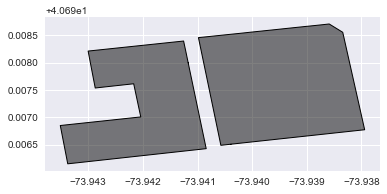

In [6]:
housing_projects[housing_projects.developmen == "SUMNER"].plot()

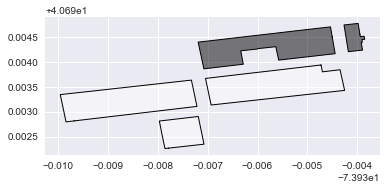

In [7]:
housing_projects[housing_projects.developmen.str.contains("ROOSEVELT I")].plot()

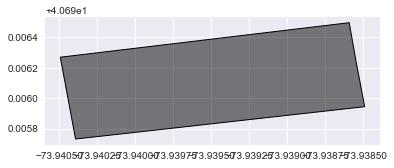

In [8]:
housing_projects[housing_projects.developmen.str.contains("303 VERNON AVENUE")].plot()

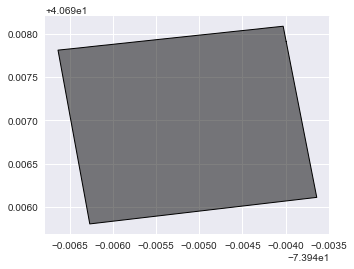

In [9]:
housing_projects[housing_projects.developmen.str.contains("TOMPKINS")].plot()

In [10]:
housing_projects[housing_projects.tds_num.str.contains("131")]

,borough,developmen,geometry,tds_num
59,BROOKLYN,TOMPKINS,"POLYGON ((-73.9439942873495 40.69791332831738,...",131


In [11]:
#original_data["geometry"] = "POINT (" + original_data.lng + " " + original_data.lat + ")"
original_data["geometry"] = " "

In [12]:
for n, p in enumerate(zip(original_data.lng, original_data.lat)):
    original_data["geometry"].iloc[n] = shp.geometry.Point(p)

/Applications/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:132: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [13]:
wifi_data = GeoDataFrame(original_data)

In [14]:
wifi_data.head()

,freq,level,altitude,idx,caps,bssid,ssid,device_model,droid_version,app_version,device_mac,time,acc,lng,lat,geometry
0,2437,-79,0,56771877,[wpa-psk-ccmp+tkip][wpa2-psk-ccmp+tkip][wps][...,70:62:b8:46:29:06,462902,VS425,5.1.1,0.3.3,d3a2898a5e731607,1.500000e+12,39.360,-73.940196,40.695837,POINT (-73.9401956 40.6958367)
1,2447,-87,0,56765714,[wpa-psk-ccmp+tkip][wpa2-psk-ccmp+tkip][wps][...,48:ee:0c:50:23:8a,502386,VS425,5.1.1,0.3.3,d3a2898a5e731607,1.500000e+12,22.663,-73.939782,40.695816,POINT (-73.9397823 40.6958165)
2,2447,-78,-9,56765759,[wpa-psk-ccmp+tkip][wpa2-psk-ccmp+tkip][wps][...,48:ee:0c:50:23:8a,502386,VS425,5.1.1,0.3.3,d3a2898a5e731607,1.500000e+12,22.199,-73.939702,40.695853,POINT (-73.939702 40.6958533)
3,2447,-74,0,56765816,[wpa-psk-ccmp+tkip][wpa2-psk-ccmp+tkip][wps][...,48:ee:0c:50:23:8a,502386,VS425,5.1.1,0.3.3,d3a2898a5e731607,1.500000e+12,21.769,-73.939759,40.695813,POINT (-73.9397594 40.6958132)
4,2447,-74,-8,56765893,[wpa-psk-ccmp+tkip][wpa2-psk-ccmp+tkip][wps][...,48:ee:0c:50:23:8a,502386,VS425,5.1.1,0.3.3,d3a2898a5e731607,1.500000e+12,20.083,-73.939599,40.696157,POINT (-73.9395986 40.6961573)


In [15]:
wifi_data.crs = housing_projects.crs #matching crs of the two geodataframes
bklyn_housing = gpd.sjoin(wifi_data, housing_projects, how="inner", op='intersects') #geo merger

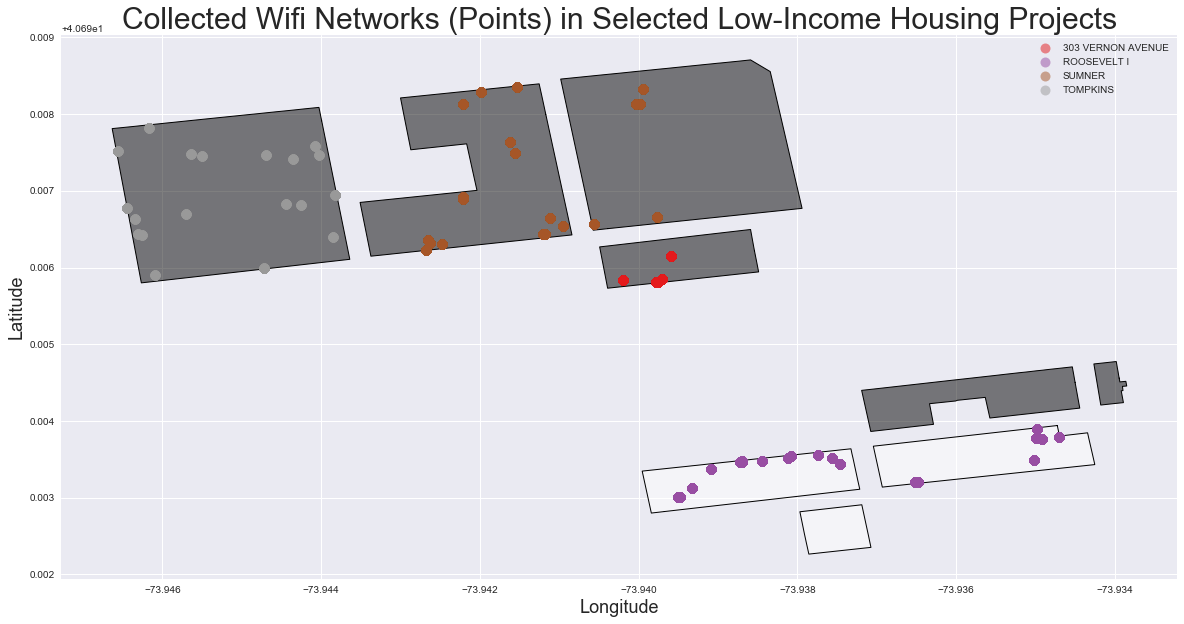

In [16]:
# non-open networks map
f,ax = pl.subplots(figsize=(20,10))
housing_projects[housing_projects.developmen == "SUMNER"].plot(ax=ax)
housing_projects[housing_projects.developmen.str.contains("ROOSEVELT I")].plot(ax=ax)
housing_projects[housing_projects.developmen.str.contains("303 VERNON AVENUE")].plot(ax=ax)
housing_projects[housing_projects.developmen.str.contains("TOMPKINS")].plot(ax=ax)
bklyn_housing.plot(column='developmen', markersize=10, ax=ax, legend=True)
plt.title("Collected Wifi Networks (Points) in Selected Low-Income Housing Projects", fontsize=30)
ax.set_ylabel('Latitude', fontsize=18)
ax.set_xlabel("Longitude", fontsize=18)

# Non-open Networks

In [17]:
# Non-open networks median levels by housing projects
bklyn_housing.pivot_table(columns="developmen", aggfunc=median, values="level")

developmen
303 VERNON AVENUE   -77
ROOSEVELT I         -76
SUMNER              -76
TOMPKINS            -75
Name: level, dtype: int64

In [18]:
# Wifi density
# Unique non-open networks by housing projects
density = bklyn_housing.groupby([bklyn_housing.developmen])['ssid'].nunique()
density

developmen
303 VERNON AVENUE    113
ROOSEVELT I          283
SUMNER               334
TOMPKINS             314
Name: ssid, dtype: int64

In [19]:
# Scans by ssid
scans_ssid = bklyn_housing.groupby([bklyn_housing.developmen, bklyn_housing.ssid])['level'].count()

In [20]:
scans_ssid = scans_ssid.unstack(fill_value=0)
scans_ssid.head()

ssid,023ee4,02426e,025a11,03b0f0,043029_guest,049b91,054fb0,05c9ce,0717ac,07ca0e,...,684900,7.64E+03,7.86E+03,745840,752820,797240,851682,929040,990800,993500
developmen,,,,,,,,,,,,,,,,,,,,,
303 VERNON AVENUE,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ROOSEVELT I,0,0,0,0,0,0,0,0,5,0,...,0,0,0,0,5,0,2,6,7,0
SUMNER,0,5,0,2,0,0,0,0,0,0,...,0,6,0,2,0,1,0,0,0,0
TOMPKINS,1,0,7,0,1,2,2,1,0,1,...,2,0,2,0,0,0,0,0,0,2


In [21]:
# Non-open networks median levels by ssid and housing project
bklyn_housing.pivot_table(columns="developmen", aggfunc=median, values="level", index="ssid")

developmen,303 VERNON AVENUE,ROOSEVELT I,SUMNER,TOMPKINS
ssid,,,,
023ee4,NaN,NaN,NaN,-73.0
02426e,NaN,NaN,-76.0,NaN
025a11,NaN,NaN,NaN,-76.0
03b0f0,NaN,NaN,-86.0,NaN
043029_guest,NaN,NaN,NaN,-79.0
049b91,NaN,NaN,NaN,-75.0
054fb0,NaN,NaN,NaN,-67.0
05c9ce,NaN,NaN,NaN,-78.0
0717ac,NaN,-75.0,NaN,NaN


# Open Networks

* flatiron free wifi
* freewifibysurface
* bryantpark.org
* DowntownBrooklynWiFi_Fon
* linknyc free wi-fi
* Metrotech
* usp park wifi
* Red Hook Wifi

In [22]:
def open_net(x):
    if "flatiron free wifi" in x:
        return True
    else:
        if "freewifibysurface" in x:
            return True
        else:
            if "freewifibysurface" in x:
                return True
            else:
                if "bryantpark.org" in x:
                    return True
                else:
                    if "DowntownBrooklynWiFi_Fon" in x:
                        return True
                    else:
                        if "linknyc free wi-fi" in x:
                            return True
                        else:
                            if "Metrotech" in x:
                                return True
                            else:
                                if "usp park wifi" in x:
                                    return True
                                else: 
                                    if "Red Hook Wifi" in x:
                                        return True
                                    else:
                                        return False

In [23]:
bklyn_housing["open_net"] = open_net(bklyn_housing.ssid)

# No Open Networks - in selected low-income housing projects

In [24]:
# Open networks median levels by housing projects
bklyn_housing[bklyn_housing.open_net == True].pivot_table(columns="developmen", aggfunc=median, values="level")

developmen
level


# Some History on Targeted Housing Projects

# http://www.complex.com/pop-culture/2013/09/which-nyc-housing-projects-have-produced-the-most-famous-people/walt-whitman-houses

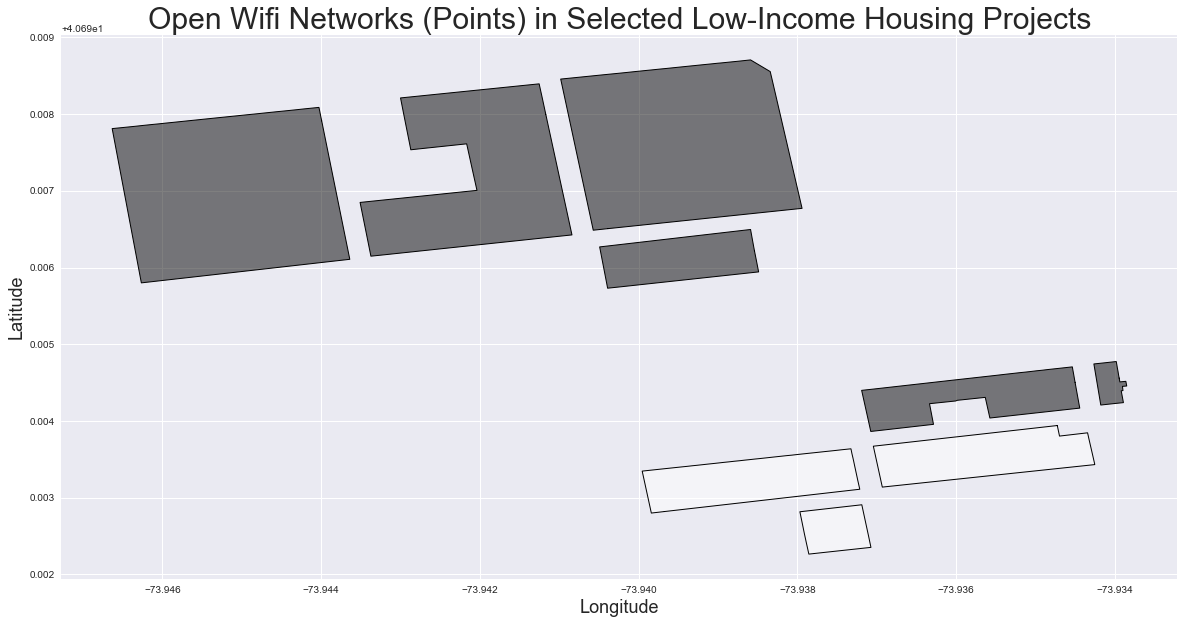

In [25]:
# open networks map
f,ax = pl.subplots(figsize=(20,10))
housing_projects[housing_projects.developmen == "SUMNER"].plot(ax=ax)
housing_projects[housing_projects.developmen.str.contains("ROOSEVELT I")].plot(ax=ax)
housing_projects[housing_projects.developmen.str.contains("303 VERNON AVENUE")].plot(ax=ax)
housing_projects[housing_projects.developmen.str.contains("TOMPKINS")].plot(ax=ax)
#bklyn_housing[bklyn_housing.open_net == True].plot(column='developmen', markersize=10, ax=ax, legend=True)
plt.title("Open Wifi Networks (Points) in Selected Low-Income Housing Projects", fontsize=30)
ax.set_ylabel('Latitude', fontsize=18)
ax.set_xlabel("Longitude", fontsize=18)

In [26]:
# NYC_Street_Centerline_(CSCL)
shape_path = "../Downloads/NYC_Street_Centerline_(CSCL)/geo_export_5354736e-3527-44b9-bb36-7ba27a36cab2.shp"
NYC_Street = GeoDataFrame.from_file(shape_path)

In [27]:
NYC_Street.crs

{'init': 'epsg:4326'}

In [28]:
NYC_Street = NYC_Street.to_crs(epsg=4326)

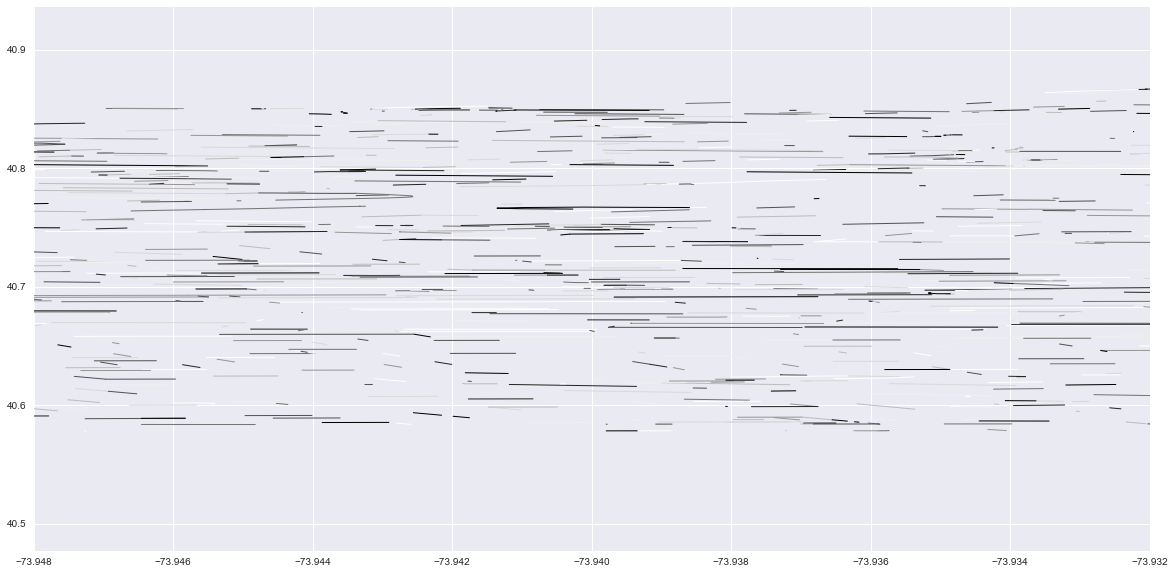

In [29]:
f,ax = pl.subplots(figsize=(20,10))
#ax1.set_xlim([0, 5])
ax.set_xlim([-73.948, -73.932])

NYC_Street[::10].plot(ax=ax)

In [30]:
NYC_Street

,bike_lane,bike_trafd,borocode,date_creat,date_modif,frm_lvl_co,full_stree,geometry,l_blkfc_id,l_high_hn,...,shape_leng,snow_pri,st_label,st_name,st_width,status,time_creat,time_modif,to_lvl_co,trafdir
0,,,2,2014-08-19,2015-12-22,13.0,MITSUBISHI WILD WETLAND TRL,LINESTRING (-73.87861544017795 40.861915301539...,0.000000e+00,,...,1026.077523,,MITSUBISHI WILD WETLAND TRL,MITSUBISHI WILD WETLAND,0.0,2,00:00:00.000,00:00:00.000,13.0,NV
1,,,4,2007-11-29,2017-03-17,13.0,28 AVE,LINESTRING (-73.7729030190404 40.7778042809822...,1.122612e+08,215-027,...,258.859740,H,28 AV,28,35.0,2,00:00:00.000,00:00:00.000,13.0,TW
2,,,2,2007-11-29,2017-03-17,13.0,ARLINGTON AVE,LINESTRING (-73.90711253281893 40.905186250792...,1.522605e+09,5699,...,454.932922,C,ARLINGTON AV,ARLINGTON,42.0,2,00:00:00.000,00:00:00.000,13.0,TW
3,,,4,2007-11-29,2017-03-17,13.0,QUEENS BLVD,LINESTRING (-73.8300230194527 40.7140059978106...,9.226172e+07,120-011,...,47.399228,C,QUEENS BLVD,QUEENS,40.0,2,00:00:00.000,00:00:00.000,13.0,TF
4,2,TW,3,2007-11-29,2017-03-17,13.0,SCHERMERHORN ST,LINESTRING (-73.98181677514282 40.687329801759...,1.922604e+09,399,...,609.424375,C,SCHERMERHORN ST,SCHERMERHORN,50.0,2,00:00:00.000,00:00:00.000,13.0,TW
5,,,5,2007-11-29,2017-03-17,13.0,ARTHUR KIL RD,LINESTRING (-74.15825784169094 40.562201976316...,1.722612e+09,554,...,268.228751,C,ARTHUR KILL RD,ARTHUR KIL,36.0,2,00:00:00.000,00:00:00.000,13.0,TW
6,,,2,2007-11-29,2017-03-17,13.0,E 181 ST,LINESTRING (-73.8871122884414 40.8484154644645...,1.522612e+09,759,...,360.814869,S,E 181 ST,181,30.0,2,00:00:00.000,00:00:00.000,13.0,TF
7,,,4,2007-11-29,2017-03-17,13.0,58 LN,LINESTRING (-73.90674661427755 40.736717566192...,1.022647e+08,51-099,...,625.213984,S,58 LA,58,30.0,2,00:00:00.000,00:00:00.000,13.0,TF
8,,,4,2007-11-29,2017-03-17,13.0,FOREST AVE,LINESTRING (-73.9009863949706 40.7024494479948...,5.226328e+07,68-099,...,260.293103,C,FOREST AV,FOREST,36.0,2,00:00:00.000,00:00:00.000,13.0,TW
9,,,5,2007-11-29,2017-03-17,13.0,TIDES LN,LINESTRING (-74.23944088631606 40.529011275075...,1.722607e+09,0,...,141.409489,V,TIDES LA,TIDES,34.0,2,00:00:00.000,00:00:00.000,13.0,TW


In [31]:
# Pluto Data
shape_path = "../Desktop/bk_mappluto_16v2/BKMapPLUTO.shp"
BKMapPLUTO = GeoDataFrame.from_file(shape_path)

In [32]:
BKMapPLUTO[BKMapPLUTO.ZipCode == 11206]

,APPBBL,APPDate,Address,AreaSource,AssessLand,AssessTot,BBL,BldgArea,BldgClass,BldgDepth,...,YearAlter2,YearBuilt,ZMCode,ZipCode,ZoneDist1,ZoneDist2,ZoneDist3,ZoneDist4,ZoneMap,geometry
186342,0.000000e+00,,55 PULASKI STREET,2,3642.0,15816.0,3.017700e+09,2988,C0,40.00,...,0,1925,,11206,R6B,,,,17a,"POLYGON ((998267.6298000067 191553.9668000042,..."
186355,0.000000e+00,,48 PULASKI STREET,2,3189.0,12806.0,3.017740e+09,3000,C0,40.00,...,0,1910,,11206,R6B,,,,17a,"POLYGON ((998211.2611999959 191374.9244000018,..."
186356,0.000000e+00,,14 HART STREET,2,5374.0,25704.0,3.017700e+09,2200,C3,40.00,...,0,1931,,11206,R6B,,,,17a,"POLYGON ((997740.3838 191577.6519999951, 99773..."
186365,0.000000e+00,,50 HART STREET,2,4049.0,17076.0,3.017700e+09,3040,C0,40.00,...,0,1910,,11206,R6B,,,,17a,"POLYGON ((998114.630400002 191634.5259999931, ..."
186373,0.000000e+00,,56 PULASKI STREET,2,2542.0,10747.0,3.017740e+09,3152,B3,42.00,...,0,1910,,11206,R6B,,,,17a,"POLYGON ((998303.8006000072 191388.9811999947,..."
186387,0.000000e+00,,82 PULASKI STREET,7,2364.0,2364.0,3.017750e+09,0,G0,0.00,...,0,0,,11206,R7A,,,,17a,"POLYGON ((998648.3170000017 191462.9415999949,..."
186388,0.000000e+00,,651 MARCY AVENUE,2,23486.0,66187.0,3.017750e+09,3690,C1,60.00,...,0,1931,,11206,R7A,,,,17a,"POLYGON ((998627.569600001 191459.8038000017, ..."
186392,0.000000e+00,,650 MARCY AVENUE,2,2840.0,14802.0,3.017740e+09,7935,C1,40.00,...,0,1910,,11206,R7A,,,,17a,"POLYGON ((998480.9640000015 191441.4177999943,..."
186396,0.000000e+00,,10 PULASKI STREET,2,16041.0,518056.0,3.017740e+09,28200,C1,94.00,...,0,1931,,11206,R6B,R6A,,,17a,"POLYGON ((997811.2205999941 191347.886800006, ..."
186405,0.000000e+00,,652 MARCY AVENUE,2,9370.0,39384.0,3.017740e+09,3900,C0,52.00,...,0,2005,,11206,R7A,,,,17a,"POLYGON ((998484.8180000037 191416.4777999967,..."


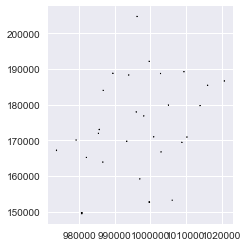

In [33]:
BKMapPLUTO[::10000].plot()

In [34]:
# epsg=4326: lat/on | 26918: NAD83/UTM zone 18N | epsg=2263 is US feet
BKMapPLUTO.crs #matching crs of the two geodataframes

{'datum': 'NAD83',
 'lat_0': 40.16666666666666,
 'lat_1': 40.66666666666666,
 'lat_2': 41.03333333333333,
 'lon_0': -74,
 'no_defs': True,
 'proj': 'lcc',
 'units': 'us-ft',
 'x_0': 300000,
 'y_0': 0}

In [35]:
#BKMapPLUTO.crs = from_epsg(4326) 
BKMapPLUTO = BKMapPLUTO.to_crs(epsg=4326)

In [36]:
housing_projects.crs

{'init': 'epsg:4326'}

In [37]:
bklyn_housing.crs

{'init': 'epsg:4326'}

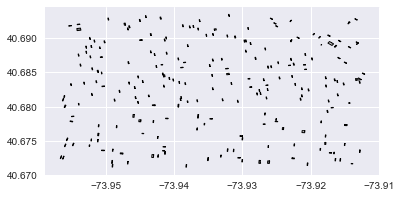

In [38]:
BKMapPLUTO[BKMapPLUTO.ZoneMap == "17a"][::100].plot()

(40.69, 40.7025)

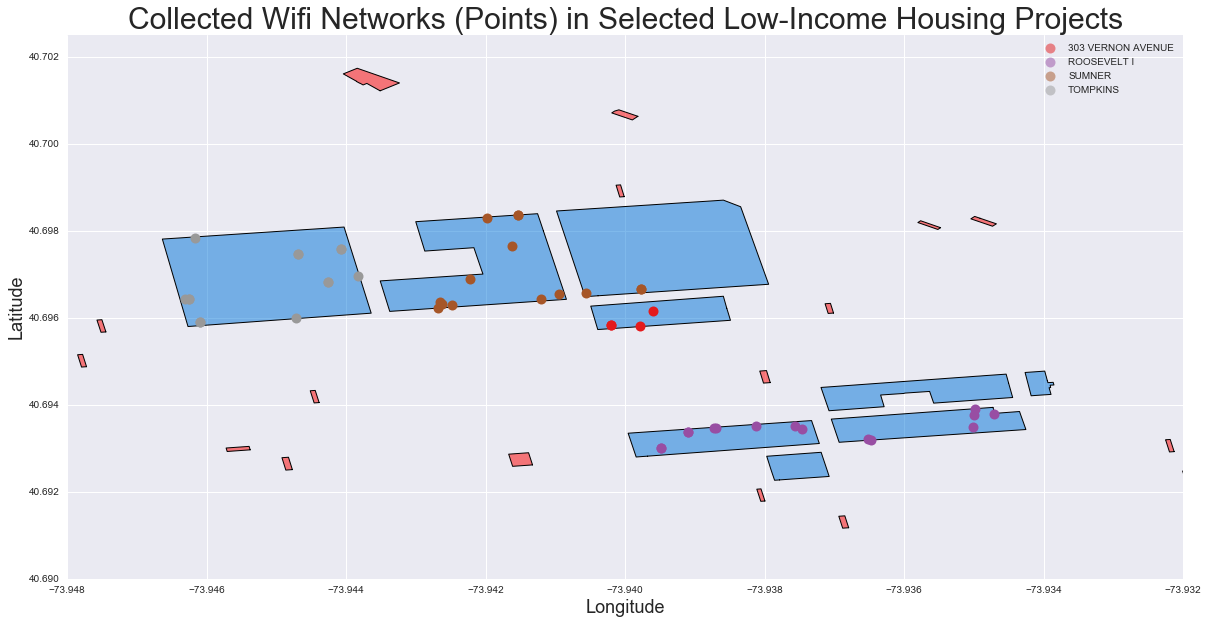

In [39]:
# non-open networks map with street overlay
f,ax = pl.subplots(figsize=(20,10))
BKMapPLUTO[::200].plot(ax=ax, color=(1.0, 0.0, 0.0, 0.2))
housing_projects[housing_projects.developmen == "SUMNER"].plot(ax=ax, color="#0074D9")
housing_projects[housing_projects.developmen.str.contains("ROOSEVELT I")].plot(ax=ax, color="#0074D9")
#housing_projects[housing_projects.developmen.str.contains("ROOSEVELT II")].plot(ax=ax, color="white")
housing_projects[housing_projects.developmen.str.contains("303 VERNON AVENUE")].plot(ax=ax, color="#0074D9")
housing_projects[housing_projects.developmen.str.contains("TOMPKINS")].plot(ax=ax, color="#0074D9")
bklyn_housing[::100].plot(column='developmen', markersize=10, ax=ax, legend=True)

#BKMapPLUTO[BKMapPLUTO.Address.str.contains("VERNON")].plot(ax=ax, color="#7FDBFF")
#BKMapPLUTO[BKMapPLUTO.Address.str.contains("MARCUS GARVEY")].plot(ax=ax, color="#7FDBFF")
#NYC_Street[::50].plot(ax=ax, color="#001f3f")
plt.title("Collected Wifi Networks (Points) in Selected Low-Income Housing Projects", fontsize=30)
ax.set_ylabel('Latitude', fontsize=18)
ax.set_xlabel("Longitude", fontsize=18)
ax.set_xlim([-73.948, -73.932])
ax.set_ylim([40.6900, 40.7025])

In [40]:
clean_data = pd.read_csv("christian_data_clean.csv")

In [41]:
clean_data.head()

,idx,lat,lng,acc,altitude,time,device_mac,app_version,droid_version,device_model,ssid,bssid,caps,level,freq
0,56629534,40.690966,-73.987686,19.957,0.0,1.500000e+12,d3a2898a5e731607,0.3.3,5.1.1,VS425,nyu-legacy,1c:e8:5d:ca:8f:33,[wpa-eap-tkip][wpa2-eap-ccmp][ess] ...,-60.0,2437.0
1,56629535,40.690966,-73.987686,19.957,0.0,1.500000e+12,d3a2898a5e731607,0.3.3,5.1.1,VS425,eduroam,1c:e8:5d:ca:8f:32,[wpa2-eap-ccmp][ess] ...,-59.0,2437.0
2,56629536,40.690966,-73.987686,19.957,0.0,1.500000e+12,d3a2898a5e731607,0.3.3,5.1.1,VS425,nyu-legacy,cc:d5:39:27:f2:43,[wpa-eap-tkip][wpa2-eap-ccmp][ess] ...,-66.0,2412.0
3,56629537,40.690966,-73.987686,19.957,0.0,1.500000e+12,d3a2898a5e731607,0.3.3,5.1.1,VS425,eduroam,cc:d5:39:27:f2:42,[wpa2-eap-ccmp][ess] ...,-67.0,2412.0
4,56629538,40.690966,-73.987686,19.957,0.0,1.500000e+12,d3a2898a5e731607,0.3.3,5.1.1,VS425,constitution,00:a2:ee:03:e3:20,[wpa2-eap-ccmp][ess] ...,-73.0,2412.0


In [42]:
#original_data["geometry"] = "POINT (" + original_data.lng + " " + original_data.lat + ")"
clean_data["geometry"] = " "

In [43]:
clean_data

,idx,lat,lng,acc,altitude,time,device_mac,app_version,droid_version,device_model,ssid,bssid,caps,level,freq,geometry
0,56629534,40.690966,-73.987686,19.957,0.0,1.500000e+12,d3a2898a5e731607,0.3.3,5.1.1,VS425,nyu-legacy,1c:e8:5d:ca:8f:33,[wpa-eap-tkip][wpa2-eap-ccmp][ess] ...,-60.0,2437.0,
1,56629535,40.690966,-73.987686,19.957,0.0,1.500000e+12,d3a2898a5e731607,0.3.3,5.1.1,VS425,eduroam,1c:e8:5d:ca:8f:32,[wpa2-eap-ccmp][ess] ...,-59.0,2437.0,
2,56629536,40.690966,-73.987686,19.957,0.0,1.500000e+12,d3a2898a5e731607,0.3.3,5.1.1,VS425,nyu-legacy,cc:d5:39:27:f2:43,[wpa-eap-tkip][wpa2-eap-ccmp][ess] ...,-66.0,2412.0,
3,56629537,40.690966,-73.987686,19.957,0.0,1.500000e+12,d3a2898a5e731607,0.3.3,5.1.1,VS425,eduroam,cc:d5:39:27:f2:42,[wpa2-eap-ccmp][ess] ...,-67.0,2412.0,
4,56629538,40.690966,-73.987686,19.957,0.0,1.500000e+12,d3a2898a5e731607,0.3.3,5.1.1,VS425,constitution,00:a2:ee:03:e3:20,[wpa2-eap-ccmp][ess] ...,-73.0,2412.0,
5,56629539,40.690966,-73.987686,19.957,0.0,1.500000e+12,d3a2898a5e731607,0.3.3,5.1.1,VS425,ng-p,00:a2:ee:03:e3:24,[wpa2-eap-ccmp][ess] ...,-73.0,2412.0,
6,56629540,40.690966,-73.987686,19.957,0.0,1.500000e+12,d3a2898a5e731607,0.3.3,5.1.1,VS425,ng-c,00:a2:ee:03:e3:23,[wpa2-eap-ccmp][ess] ...,-74.0,2412.0,
7,56629541,40.690966,-73.987686,19.957,0.0,1.500000e+12,d3a2898a5e731607,0.3.3,5.1.1,VS425,ng-m,00:a2:ee:03:e3:25,[wpa2-eap-ccmp][ess] ...,-74.0,2412.0,
8,56629542,40.690966,-73.987686,19.957,0.0,1.500000e+12,d3a2898a5e731607,0.3.3,5.1.1,VS425,lifelineak,00:1c:c2:22:9d:f4,[wpa-psk-ccmp+tkip][wpa2-psk-ccmp+tkip][ess] ...,-79.0,2452.0,
9,56629543,40.690966,-73.987686,19.957,0.0,1.500000e+12,d3a2898a5e731607,0.3.3,5.1.1,VS425,s0nycl1f3l1ne_1,38:2c:4a:a2:ee:d6,[wpa2-psk-ccmp][ess] ...,-77.0,2447.0,


In [44]:
clean_data.columns

Index(['idx', 'lat', 'lng', 'acc', 'altitude', 'time', 'device_mac',
       'app_version', 'droid_version', 'device_model', 'ssid', 'bssid', 'caps',
       'level', 'freq', 'geometry'],
      dtype='object')

In [ ]:
# upload v3 to github